<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>"Глубокое обучение". Продвинутый поток</b></h3>


<h2 style="text-align: center;"><b>Семинар 7. Многослойная сеть на PyTorch</b></h3>

В этом ноутбке мы научимся писать свои нейросети на фреймворке PyTorch, конкретно - рассмотрим, как написать многослойную полносвязную сеть (Fully-Connected, FC), и сравним их качество на датасете картинок MNIST.

<h3 style="text-align: center;"><b>Компоненты нейросети</b></h3>

Здесь самое время напомнить о том, какие вещи играют принципиальную роль в построении любой ***нейронной сети*** (все их мы задаём *руками*, самостоятельно):  

- непосредственно, сама **архитектура** нейросети (сюда входят типы функций активации у каждого нейрона);
- начальная **инициализация** весов каждого слоя;
- метод **оптимизации** нейросети (сюда ещё входит метод изменения `learning_rate`);
- размер **батчей** (`batch_size`);
- количество итераций обучения (`num_epochs`);
- **функция потерь** (`loss`);  
- тип **регуляризации** нейросети (для каждого слоя можно свой);  

То, что связано с ***данными и задачей***:  
- само **качество** выборки (непротиворечивость, чистота, корректность постановки задачи);  
- **размер** выборки;  

<h3 style="text-align: center;"><b>Многослойная нейронная сеть</b></h3>

Как можно понять из названия, многослойная нейросеть состоит из нескольких **слоёв**. Каждый слой состоит из **нейронов**. Ранее мы уже писали свой нейрон на NumPy, вот из таких нейронов и состоит ***MLP (Multi-Layer Perceptron)***. Ещё такую многослойную нейросеть, у которой каждый нейрон на предыдущем уровне соединён с нейроном на следующем уровне, называют ***Fully-Connected-сетью*** (или ***Dense-сетью***).  

Расмотрим их устройство более подробно:

* Вот так выглядит двухслойная нейросеть (первый слой - input layer - не считается, потому что это, по сути, не слой):

<img src="http://cs231n.github.io/assets/nn1/neural_net.jpeg" width=300, height=200>

* Так выглядит трёхслойная нейросеть:

<img src="http://cs231n.github.io/assets/nn1/neural_net2.jpeg" width=400>

.. и так далее для большего случая слоёв.

**Обратите внимание:** связи есть у нейронов со слоя $L_{i-1}$  и нейронов $L_{i}$, но между нейронами в одном слое связей **нет**.

**Входной слой** -- это данные (матрица $(n, m)$).

Слои, которые не являются входными или выходными, называются **скрытыми слоями (hidden layers)**.

При решении ***задачи регрессии*** на **выходном слое** обычно один нейрон, который возвращает предсказанные числа (для каждого объекта по числу).  

В случае ***задачи классификации*** на **выходном слое** обычно один нейрон, если задача бинарной классификации, и $K$ нейронов, если задача $K$-класовой классификации.

#### Forward pass в MLP

Каждый слой многослойной нейросети - это матрица весов, строки которой - это нейроны (одна строка - один нейрон), а столбцы - веса каждого нейрона (то есть одна строка - это веса одного нейрона).

Допустим, мы решаем задачу $K$-классовой классификации (на последнем слое $K$ нейронов). Рассмотрим, как в таком случае выглядит `forward_pass` нейросети:

* Вход: $$X =
\left(
\begin{matrix} 
x_{11} & ... & x_{1M} \\
... & \ddots  & ...\\
x_{N1} & ... & x_{NM} 
\end{matrix}
\right)
$$

-- матрица $(N, M)$

* Структура сети - много слоёв, в слоях много нейронов. Первый слой (после входного) выглядит так:

$$ W^1 =
\left(
\begin{matrix} 
w_{11} & ... & w_{1L_1} \\
... & \ddots  & ...\\
w_{M1} & ... & w_{ML_1} 
\end{matrix}
\right)
$$

-- матрица $(M, L_1)$

То есть это в точности $L_1$ нейронов, каждый имеет свои собственные веса, их $M$ штук.

Мы помним, что нейрон - это линейное преобразование и потом нелинейная функция активации от этого преобразования. Однако в многослойных нейростеях часто отделяют `Linear` часть и `Activation`, то есть слоем считаем набор весов нейронов, а следующий слой всегда функция активации (у всех нейронов из слоя она одна и та же, обычно фреймворки не позволяют задавать конкретному нейрону в слое отличную от других нейронов в этом слое функцию активации, однако это легко сделать, объявив слой из одного нейрона).

* Другие слои выглядит точно так же, как первый слой. Например, у второй слой будет такой:

$$ W^2 =
\left(
\begin{matrix} 
w_{11} & ... & w_{1L_2} \\
... & \ddots  & ...\\
w_{L_11} & ... & w_{L_1L_2} 
\end{matrix}
\right)
$$

-- матрица $(L_1, L_2)$

То есть это в точности $L_2$ нейронов, каждый имеет свои собственные веса, их $L_1$ штук.

* Выходной слой:  

Пусть в нейросети до выходного слоя идут $t$ слоёв. Тогда выходной слой имеет форму:

$$ W^{out} =
\left(
\begin{matrix} 
w_{11} & ... & w_{1K} \\
... & \ddots  & ...\\
w_{L_t1} & ... & w_{L_tK} 
\end{matrix}
\right)
$$

-- матрица $(L_t, K)$, где $L_t$ - количество нейронов в $t$-ом слое, а $K$ -- количество классов.

В итоге ***для `forward_pass` нам нужно просто последовтельно перемножить матрицы друг за другом, применяя после каждого умножения соответсвующую функцию активации***.

*Примечание*: можно думать об умножении на очередную матрицу весов как на переход в **новое признаковое пространство**. Действительно, когда подаём матрицу $X$ и умножаем на матрицу первого слоя, мы получаем матрицу размера $(N, L_1)$, то есть как будто $L_1$ "новых" признаков (построенных как линейная комбинация старых до применения функции активации, и уже как нелинейная комбинация после активации).

**Backward pass в MLP**

Обучается с помощью метода "Error Backpropagation" - ["Обратное распространение ошибки"](https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%BE%D0%B1%D1%80%D0%B0%D1%82%D0%BD%D0%BE%D0%B3%D0%BE_%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%BE%D1%81%D1%82%D1%80%D0%B0%D0%BD%D0%B5%D0%BD%D0%B8%D1%8F_%D0%BE%D1%88%D0%B8%D0%B1%D0%BA%D0%B8), принцип распространения очень похож на то, как мы обучали один нейрон - это градиентный спуск, но по "всей нейросети" сразу.  

Backpropagation работает корректно благодаря ***chain rule*** (=правилу взятия производной сложной функции):  

Если $f(x) = f(g(x))$, то:  

$$\frac{\partial{f}}{\partial{x}} = \frac{\partial{f}}{\partial{g}} \frac{\partial{g}}{\partial{x}}$$

Более подробно про backpropagation можно прочитать здесь (на английском):  https://mattmazur.com/2015/03/17/a-step-by-step-backpropagation-example/

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import torch

## Датасет
Мы будем работать с датасетом "Игрушка дьявола". Генерация и отрисовка датасета:

In [2]:
# код для генерации взят из Стэнфордсокго курса:
# http://cs231n.github.io/neural-networks-case-study/#linear

N = 100
D = 2
K = 3
X = np.zeros((N * K, D))
y = np.zeros(N * K, dtype='uint8')

for j in range(K):
    ix = range(N * j,N * (j + 1))
    r = np.linspace(0.0, 1, N)
    t = np.linspace(j * 4, (j + 1) * 4,N) + np.random.randn(N) * 0.2 # theta
    X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
    y[ix] = j

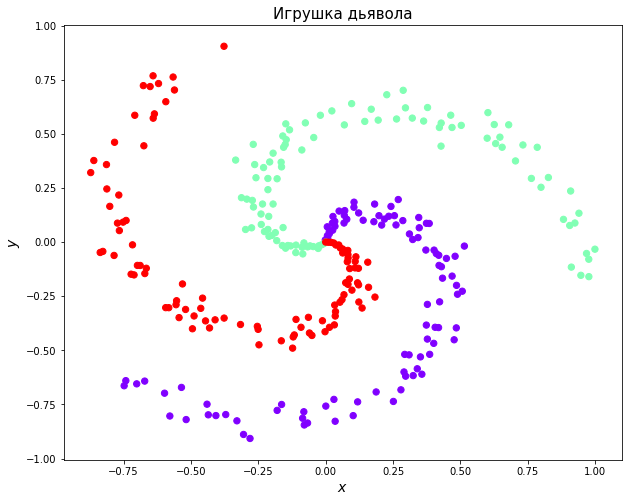

In [3]:
# Отрисовочная магия, снова взято из:
# http://cs231n.github.io/neural-networks-case-study/#linear

plt.figure(figsize=(10, 8))

plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.rainbow)

plt.title('Игрушка дьявола', fontsize=15)
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.show();

<h3 style="text-align: center;"><b>Многослойная нейросеть на PyTorch</b></h3>

Ешё раз напомним про основные компоненты нейросети:

- непосредственно, сама **архитектура** нейросети (сюда входят типы функций активации у каждого нейрона);
- начальная **инициализация** весов каждого слоя;
- метод **оптимизации** нейросети (сюда ещё входит метод изменения `learning_rate`);
- размер **батчей** (`batch_size`);
- количетсво итераций обучения (`num_epochs`);
- **функция потерь** (`loss`);  
- тип **регуляризации** нейросети (для каждого слоя можно свой);  

То, что связано с ***данными и задачей***:  
- само **качество** выборки (непротиворечивость, чистота, корректность постановки задачи);  
- **размер** выборки;  

## PyTorch для нейронных сетей

Основная абстракция для построения нейронной сети --- это torch.nn.Module. Module --- это те кирпичики, из которых мы будем складывать любую нейронную сеть. Как мы узнали на лекции, для определения модуля достаточно задать методы Forward и Backward. Базовый класс для nn.Module в PyTorch:



In [4]:
from torch import nn
import torch.nn.functional as F

print(nn.Module.__doc__)

Base class for all neural network modules.

    Your models should also subclass this class.

    Modules can also contain other Modules, allowing to nest them in
    a tree structure. You can assign the submodules as regular attributes::

        import torch.nn as nn
        import torch.nn.functional as F

        class Model(nn.Module):
            def __init__(self):
                super(Model, self).__init__()
                self.conv1 = nn.Conv2d(1, 20, 5)
                self.conv2 = nn.Conv2d(20, 20, 5)

            def forward(self, x):
                x = F.relu(self.conv1(x))
                return F.relu(self.conv2(x))

    Submodules assigned in this way will be registered, and will have their
    parameters converted too when you call :meth:`to`, etc.
    


### Модуль Sequential

Основной класс в PyTorch для работы с нейронными сетями --- это  Sequential.  Sequential --- это шаблон для самой простой последовательной нейронной сети. Методы Forward и Backward заданы соответственно: мы пробрасываем выходы и градиенты через все слои, из которых состоит Module. Посмотрим, как это работает.

Не будем медлить - бахнем 100 нейронов в двуслойную нейросеть. 

In [5]:
# N - размер батча (batch_size, нужно для метода оптимизации); 
# D_in - размерность входа (количество признаков у объекта);
# H - размерность скрытых слоёв; 
# D_out - размерность выходного слоя (суть - количество классов)
N, D_in, H, D_out = 64, 2, 100, 3

# Use the nn package to define our model and loss function.
two_layer_net = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
    torch.nn.Softmax()
)

Посмотрим, что у нас получилось. Пропустим мусорные данные через нашу модель методом forward.

In [6]:
print("Weight shapes:", [w.shape for w in two_layer_net.parameters()])

Weight shapes: [torch.Size([100, 2]), torch.Size([100]), torch.Size([3, 100]), torch.Size([3])]


In [7]:
# create dummy data with 3 samples and 784 features
x_batch = torch.tensor(X[:3], dtype=torch.float32)
y_batch = torch.tensor(y[:3], dtype=torch.float32)

# compute outputs given inputs, both are variables
y_predicted = two_layer_net(x_batch)[0]

y_predicted  # display what we've got

c:\users\shiro\appdata\local\programs\python\python37\lib\site-packages\torch\nn\modules\container.py:100: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


tensor([0.2719, 0.2667, 0.4614], grad_fn=<SelectBackward>)

## Код для генерации мини-батчей



In [8]:
from torch.autograd import Variable

In [9]:
def batch_gen(X, y, batch_size=128):
    idx = np.random.randint(X.shape[0], size=batch_size)
    X_batch = X[idx]
    y_batch = y[idx]
  
    return Variable(torch.FloatTensor(X_batch)), Variable(torch.LongTensor(y_batch))

In [12]:
batch_gen(X, y)[1].shape

torch.Size([128])

In [13]:
two_layer_net.forward(batch_gen(X,y)[0])

tensor([[0.2514, 0.2429, 0.5057],
        [0.3063, 0.2666, 0.4270],
        [0.3117, 0.2676, 0.4207],
        [0.2813, 0.2605, 0.4582],
        [0.2615, 0.2588, 0.4797],
        [0.2719, 0.2667, 0.4614],
        [0.2572, 0.2519, 0.4908],
        [0.3117, 0.2676, 0.4207],
        [0.2521, 0.2467, 0.5011],
        [0.2577, 0.2506, 0.4917],
        [0.2513, 0.2441, 0.5046],
        [0.2877, 0.2741, 0.4382],
        [0.2533, 0.2465, 0.5002],
        [0.2934, 0.2650, 0.4416],
        [0.2847, 0.2616, 0.4537],
        [0.2647, 0.2786, 0.4567],
        [0.2483, 0.2260, 0.5257],
        [0.2546, 0.2697, 0.4756],
        [0.3262, 0.2868, 0.3870],
        [0.2654, 0.2577, 0.4770],
        [0.2691, 0.2622, 0.4687],
        [0.2802, 0.2825, 0.4373],
        [0.2847, 0.2608, 0.4545],
        [0.2714, 0.2811, 0.4475],
        [0.2761, 0.2798, 0.4441],
        [0.2769, 0.2666, 0.4565],
        [0.2596, 0.2493, 0.4911],
        [0.2723, 0.2583, 0.4694],
        [0.2660, 0.2636, 0.4704],
        [0.260

Не забываем оборачивать данные (без этого градиенты не посчитать):

## Функция потерь и оптимизатор

In [14]:
loss_fn = torch.nn.CrossEntropyLoss(size_average=False)

learning_rate = 1e-4
optimizer = torch.optim.SGD(two_layer_net.parameters(), lr=learning_rate)

c:\users\shiro\appdata\local\programs\python\python37\lib\site-packages\torch\nn\_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


## Обучение модели

In [15]:
# пример взят из официального туториала: 
# https://pytorch.org/tutorials/beginner/pytorch_with_examples.html
for t in range(10000):
    x_batch, y_batch = batch_gen(X, y)
    
    # forward
    y_pred = two_layer_net(x_batch)

    # loss
    loss = loss_fn(y_pred, y_batch)
    print('{} {}'.format(t, loss.data))

    # ЗАНУЛЯЕМ!
    optimizer.zero_grad()

    # backward
    loss.backward()

    # ОБНОВЛЯЕМ! 
    optimizer.step()

0 142.18701171875
1 143.15846252441406
2 143.4314422607422
3 142.71554565429688
4 140.93295288085938
5 141.95668029785156
6 142.24789428710938
7 142.4391326904297
8 142.9433135986328
9 140.2275848388672
10 141.43463134765625
11 140.28297424316406
12 140.8795623779297
13 141.49966430664062
14 141.34725952148438
15 141.30557250976562
16 140.7631072998047
17 141.26190185546875
18 141.92977905273438
19 141.69857788085938
20 141.30030822753906
21 140.6277618408203
22 142.27285766601562
23 140.57577514648438
24 140.91668701171875
25 141.3430938720703
26 140.09823608398438
27 141.19549560546875
28 141.78048706054688
29 140.93832397460938
30 142.5562286376953
31 140.0231475830078
32 141.0240020751953
33 141.1554412841797
34 140.58566284179688
35 141.82362365722656
36 140.5819854736328
37 140.6508331298828
38 141.3756561279297
39 140.51358032226562
40 141.09539794921875
41 142.02804565429688
42 139.73304748535156
43 139.26025390625
44 140.91180419921875
45 141.84835815429688
46 140.813049316406

395 130.1795654296875
396 129.1456298828125
397 127.09269714355469
398 130.05783081054688
399 129.65673828125
400 130.35247802734375
401 128.88528442382812
402 129.78297424316406
403 128.4395294189453
404 127.65798950195312
405 128.4703826904297
406 128.36813354492188
407 127.53633117675781
408 127.99342346191406
409 129.41159057617188
410 125.36957550048828
411 127.9578857421875
412 127.4521484375
413 129.17909240722656
414 127.07139587402344
415 127.77228546142578
416 129.22337341308594
417 130.12432861328125
418 129.75833129882812
419 128.52386474609375
420 128.88478088378906
421 128.33477783203125
422 131.3803253173828
423 127.99978637695312
424 126.7721939086914
425 126.54743957519531
426 129.56430053710938
427 129.30262756347656
428 128.88873291015625
429 128.45172119140625
430 123.00395965576172
431 127.85786437988281
432 127.89480590820312
433 127.12358856201172
434 127.63310241699219
435 129.90562438964844
436 126.94487762451172
437 127.35235595703125
438 129.7620849609375
439

806 122.43816375732422
807 118.47000885009766
808 123.13734436035156
809 120.11538696289062
810 120.65949249267578
811 122.15987396240234
812 123.63965606689453
813 119.41398620605469
814 121.28767395019531
815 120.86035919189453
816 122.62244415283203
817 122.1346435546875
818 119.94329833984375
819 120.16284942626953
820 123.49053192138672
821 121.68763732910156
822 125.85275268554688
823 119.29110717773438
824 123.56708526611328
825 119.00772094726562
826 123.22675323486328
827 120.42594146728516
828 119.32508087158203
829 120.00584411621094
830 121.90376281738281
831 121.75731658935547
832 118.94526672363281
833 122.26422119140625
834 121.67292022705078
835 125.84659576416016
836 123.95902252197266
837 121.92681884765625
838 118.4520263671875
839 121.8375015258789
840 123.78518676757812
841 120.33211517333984
842 118.58111572265625
843 118.34385681152344
844 124.5574722290039
845 122.90464782714844
846 123.6942138671875
847 123.47359466552734
848 122.06422424316406
849 122.94831085

1218 119.89766693115234
1219 119.16416931152344
1220 118.86212921142578
1221 126.84957122802734
1222 118.37113952636719
1223 117.73270416259766
1224 115.87213134765625
1225 118.6903305053711
1226 116.72489166259766
1227 123.79983520507812
1228 114.40955352783203
1229 118.73139190673828
1230 119.17040252685547
1231 118.9060287475586
1232 119.89413452148438
1233 118.77308654785156
1234 120.32777404785156
1235 117.58379364013672
1236 121.73436737060547
1237 118.73579406738281
1238 116.65127563476562
1239 116.35099792480469
1240 117.1810531616211
1241 118.82532501220703
1242 121.95487976074219
1243 123.14900970458984
1244 119.40679168701172
1245 117.5584487915039
1246 117.33354187011719
1247 116.08517456054688
1248 119.85380554199219
1249 120.64604949951172
1250 119.57661437988281
1251 118.14984130859375
1252 118.56521606445312
1253 121.07365417480469
1254 121.38156127929688
1255 118.32642364501953
1256 119.84024810791016
1257 118.32465362548828
1258 116.03883361816406
1259 112.64449310302

1627 120.34303283691406
1628 117.48434448242188
1629 115.56935119628906
1630 114.49759674072266
1631 113.13999938964844
1632 120.1423568725586
1633 115.33050537109375
1634 119.049072265625
1635 118.62051391601562
1636 119.0392837524414
1637 115.0372085571289
1638 115.57023620605469
1639 113.91923522949219
1640 114.30020141601562
1641 113.98152923583984
1642 114.2034683227539
1643 119.76343536376953
1644 117.98286437988281
1645 114.9044189453125
1646 115.79759216308594
1647 114.75090026855469
1648 114.96045684814453
1649 118.96087646484375
1650 119.29180908203125
1651 118.09648895263672
1652 118.2197265625
1653 116.46341705322266
1654 112.098388671875
1655 115.53289031982422
1656 115.70146942138672
1657 117.77536010742188
1658 116.70121002197266
1659 122.25345611572266
1660 114.7521743774414
1661 118.61943817138672
1662 118.33677673339844
1663 118.29570770263672
1664 122.7332763671875
1665 119.48265075683594
1666 117.83119201660156
1667 116.0252914428711
1668 118.31114196777344
1669 114

1995 117.10860443115234
1996 113.45795440673828
1997 119.44181823730469
1998 117.62520599365234
1999 110.0076675415039
2000 118.29039001464844
2001 122.3443603515625
2002 121.93923950195312
2003 116.25032806396484
2004 112.59381103515625
2005 111.80584716796875
2006 115.11454010009766
2007 116.51625061035156
2008 118.5063247680664
2009 112.5444107055664
2010 117.9395523071289
2011 115.88578033447266
2012 120.14122772216797
2013 115.42457580566406
2014 115.88534545898438
2015 114.66542053222656
2016 119.79643249511719
2017 115.76959228515625
2018 115.26780700683594
2019 118.0466079711914
2020 115.0889892578125
2021 113.83203125
2022 118.36528778076172
2023 113.10286712646484
2024 121.13700866699219
2025 120.92960357666016
2026 115.15567779541016
2027 117.79310607910156
2028 115.3069076538086
2029 120.20527648925781
2030 116.49292755126953
2031 116.44281768798828
2032 117.08998107910156
2033 109.93783569335938
2034 117.52774810791016
2035 110.78205108642578
2036 114.86976623535156
2037 1

2345 115.695556640625
2346 113.63151550292969
2347 116.90735626220703
2348 117.29629516601562
2349 117.44559478759766
2350 112.4533462524414
2351 117.90784454345703
2352 115.95195007324219
2353 116.62464904785156
2354 114.4815902709961
2355 117.26953125
2356 118.35372161865234
2357 115.67053985595703
2358 116.50479125976562
2359 118.58092498779297
2360 113.49360656738281
2361 113.00901794433594
2362 111.75819396972656
2363 119.88842010498047
2364 118.24243927001953
2365 117.42815399169922
2366 117.73531341552734
2367 112.50558471679688
2368 115.70146179199219
2369 120.47440338134766
2370 112.12129211425781
2371 121.60603332519531
2372 119.08167266845703
2373 116.7768783569336
2374 113.06861114501953
2375 118.52159881591797
2376 111.59274291992188
2377 115.8700180053711
2378 120.18761444091797
2379 114.06072998046875
2380 113.11141967773438
2381 115.16011047363281
2382 118.93091583251953
2383 114.37596130371094
2384 117.08062744140625
2385 113.87908935546875
2386 117.52983856201172
2387

2765 118.38309478759766
2766 117.85933685302734
2767 114.3234634399414
2768 111.67223358154297
2769 115.71062469482422
2770 112.4935073852539
2771 113.13776397705078
2772 116.18565368652344
2773 119.12236785888672
2774 112.51595306396484
2775 115.68106079101562
2776 113.00504302978516
2777 119.47908020019531
2778 115.3309097290039
2779 114.31295013427734
2780 117.52765655517578
2781 116.75565338134766
2782 119.88631439208984
2783 114.87782287597656
2784 117.1737060546875
2785 117.5433120727539
2786 115.34746551513672
2787 117.22898864746094
2788 117.40736389160156
2789 114.04096984863281
2790 117.59098815917969
2791 114.46131134033203
2792 108.61503601074219
2793 115.45372772216797
2794 115.22782135009766
2795 111.7325210571289
2796 115.0691146850586
2797 117.46308135986328
2798 114.46416473388672
2799 114.0169448852539
2800 118.62269592285156
2801 117.6329116821289
2802 113.77971649169922
2803 115.77751159667969
2804 117.60401153564453
2805 115.28713989257812
2806 115.92548370361328
2

3171 115.7929916381836
3172 113.58208465576172
3173 115.80494689941406
3174 115.27532958984375
3175 118.77519226074219
3176 114.57638549804688
3177 116.74808502197266
3178 118.01950073242188
3179 114.16130065917969
3180 114.64815521240234
3181 117.01655578613281
3182 113.81511688232422
3183 112.84940338134766
3184 113.30632781982422
3185 114.53111267089844
3186 113.26827239990234
3187 114.18643951416016
3188 108.86188507080078
3189 115.02559661865234
3190 115.7274398803711
3191 118.97615051269531
3192 112.19338989257812
3193 115.60323333740234
3194 117.19377136230469
3195 112.78498077392578
3196 116.46548461914062
3197 114.96817779541016
3198 113.710205078125
3199 111.98194885253906
3200 119.90654754638672
3201 119.07869720458984
3202 113.8392562866211
3203 114.74813842773438
3204 113.54458618164062
3205 115.5374526977539
3206 117.66452026367188
3207 115.95441436767578
3208 114.26033020019531
3209 114.17504119873047
3210 113.33512878417969
3211 112.90583801269531
3212 115.5768432617187

3571 113.69824981689453
3572 116.52862548828125
3573 113.8404541015625
3574 113.89971160888672
3575 113.50989532470703
3576 113.1512680053711
3577 114.44528198242188
3578 111.90210723876953
3579 115.25345611572266
3580 112.81878662109375
3581 117.58771514892578
3582 116.52716064453125
3583 117.21880340576172
3584 114.53572845458984
3585 118.60609436035156
3586 116.82553100585938
3587 110.2691879272461
3588 118.74472045898438
3589 115.08708953857422
3590 115.89836120605469
3591 116.95204162597656
3592 117.71488952636719
3593 117.19852447509766
3594 116.3695297241211
3595 113.73536682128906
3596 113.11748504638672
3597 113.39422607421875
3598 113.41815185546875
3599 113.02934265136719
3600 116.03221893310547
3601 116.56147766113281
3602 111.62530517578125
3603 111.76921081542969
3604 115.07963562011719
3605 111.97498321533203
3606 113.60005950927734
3607 111.71636199951172
3608 115.98689270019531
3609 116.05707550048828
3610 109.85514831542969
3611 115.96199035644531
3612 114.81914520263

3972 113.97364807128906
3973 113.0294418334961
3974 114.76023864746094
3975 113.52536010742188
3976 108.85467529296875
3977 111.04537200927734
3978 110.67539978027344
3979 109.72303771972656
3980 118.53382873535156
3981 114.29462432861328
3982 110.49368286132812
3983 112.7099609375
3984 111.91978454589844
3985 110.1175765991211
3986 114.90888214111328
3987 111.32549285888672
3988 116.65728759765625
3989 120.00008392333984
3990 113.58177185058594
3991 110.04918670654297
3992 113.32437133789062
3993 113.9027328491211
3994 108.15448760986328
3995 117.60653686523438
3996 113.92586517333984
3997 113.12998962402344
3998 110.78462982177734
3999 111.80022430419922
4000 113.07860565185547
4001 106.67939758300781
4002 110.87337493896484
4003 113.79045104980469
4004 111.2649917602539
4005 113.7486343383789
4006 119.78129577636719
4007 114.82554626464844
4008 109.35606384277344
4009 113.87482452392578
4010 115.41609954833984
4011 111.32818603515625
4012 112.92256164550781
4013 112.7458267211914
40

4374 112.34603118896484
4375 109.99457550048828
4376 114.39521026611328
4377 110.12500762939453
4378 114.18650817871094
4379 118.48246002197266
4380 112.62427520751953
4381 110.47019958496094
4382 117.7816162109375
4383 112.83193969726562
4384 110.81046295166016
4385 109.25354766845703
4386 113.07247924804688
4387 111.65658569335938
4388 113.56917572021484
4389 115.3234634399414
4390 114.16838836669922
4391 110.50458526611328
4392 113.16297912597656
4393 111.55503845214844
4394 106.91291046142578
4395 116.19520568847656
4396 113.13060760498047
4397 115.66460418701172
4398 115.77997589111328
4399 109.40913391113281
4400 115.87373352050781
4401 110.69883728027344
4402 111.06599426269531
4403 112.3785629272461
4404 115.76630401611328
4405 111.9624252319336
4406 119.09161376953125
4407 114.32148742675781
4408 115.8831558227539
4409 117.69674682617188
4410 112.74748992919922
4411 112.59015655517578
4412 113.67291259765625
4413 111.7115478515625
4414 110.93555450439453
4415 117.4359588623046

4739 109.3810806274414
4740 109.31340026855469
4741 107.35802459716797
4742 110.62755584716797
4743 114.20870971679688
4744 112.49971008300781
4745 113.98622131347656
4746 110.87332916259766
4747 114.09302520751953
4748 111.01219940185547
4749 108.65093994140625
4750 117.61689758300781
4751 108.38419342041016
4752 111.1280746459961
4753 118.48638153076172
4754 111.91204833984375
4755 119.93885040283203
4756 115.49095916748047
4757 108.64915466308594
4758 111.62718963623047
4759 108.35418701171875
4760 112.40660095214844
4761 109.59810638427734
4762 117.75382995605469
4763 108.08243560791016
4764 109.30889129638672
4765 113.58203125
4766 113.45024871826172
4767 117.68453216552734
4768 117.62234497070312
4769 109.99877166748047
4770 113.30889892578125
4771 114.83097839355469
4772 111.13667297363281
4773 114.42374420166016
4774 112.34907531738281
4775 114.70210266113281
4776 115.6937255859375
4777 119.2444076538086
4778 113.2484130859375
4779 113.97260284423828
4780 104.76593780517578
478

5171 114.6765365600586
5172 110.46165466308594
5173 111.56211853027344
5174 111.6766357421875
5175 116.81505584716797
5176 111.546630859375
5177 110.36038970947266
5178 108.52082824707031
5179 115.98746490478516
5180 109.97532653808594
5181 113.55998229980469
5182 107.27366638183594
5183 105.05174255371094
5184 110.69020080566406
5185 110.68275451660156
5186 113.40818786621094
5187 111.62867736816406
5188 112.99520874023438
5189 113.02428436279297
5190 115.63963317871094
5191 110.52933502197266
5192 112.74296569824219
5193 112.79253387451172
5194 109.97581481933594
5195 113.50896453857422
5196 114.07209014892578
5197 114.49375915527344
5198 113.30606842041016
5199 107.90277099609375
5200 113.87677001953125
5201 112.33702087402344
5202 113.04183197021484
5203 113.60826873779297
5204 114.27456665039062
5205 111.32744598388672
5206 113.79596710205078
5207 112.82044982910156
5208 109.66002655029297
5209 114.77362060546875
5210 110.01995086669922
5211 113.93118286132812
5212 113.82788085937

5598 113.88800811767578
5599 117.0902328491211
5600 110.68888854980469
5601 111.41885375976562
5602 113.2800521850586
5603 116.12175750732422
5604 115.96593475341797
5605 107.59217071533203
5606 112.53384399414062
5607 106.17269134521484
5608 109.57073211669922
5609 115.60636901855469
5610 110.2029037475586
5611 114.19093322753906
5612 114.00115966796875
5613 114.28662872314453
5614 111.01957702636719
5615 109.30754089355469
5616 112.01866912841797
5617 112.74411010742188
5618 107.69153594970703
5619 110.39158630371094
5620 111.98989868164062
5621 111.23966979980469
5622 111.15968322753906
5623 117.10858917236328
5624 109.20978546142578
5625 106.53035736083984
5626 115.70526885986328
5627 110.62518310546875
5628 108.60804748535156
5629 115.87152862548828
5630 115.10433959960938
5631 111.68936157226562
5632 112.35717010498047
5633 106.5548324584961
5634 115.21456909179688
5635 113.20640563964844
5636 112.32154846191406
5637 109.05565643310547
5638 111.25498962402344
5639 112.13884735107

5970 110.34857940673828
5971 116.34847259521484
5972 108.03460693359375
5973 115.09353637695312
5974 112.65164947509766
5975 107.91507720947266
5976 108.26312255859375
5977 105.2309341430664
5978 113.95648193359375
5979 110.45874786376953
5980 114.50508117675781
5981 109.35053253173828
5982 109.35874938964844
5983 112.70355224609375
5984 108.93118286132812
5985 116.079833984375
5986 107.87509155273438
5987 111.36607360839844
5988 110.78240203857422
5989 114.72745513916016
5990 109.43630981445312
5991 113.2079849243164
5992 108.79796600341797
5993 116.13301086425781
5994 113.90084075927734
5995 111.95913696289062
5996 114.22555541992188
5997 109.19292449951172
5998 111.40534973144531
5999 113.13910675048828
6000 110.001220703125
6001 114.46997833251953
6002 109.9744873046875
6003 112.7705078125
6004 107.18104553222656
6005 110.04580688476562
6006 110.57991790771484
6007 111.30134582519531
6008 110.22821044921875
6009 106.33595275878906
6010 105.87718200683594
6011 113.21174621582031
601

6361 110.25379943847656
6362 111.84585571289062
6363 112.89479064941406
6364 111.46470642089844
6365 104.99806213378906
6366 107.64727783203125
6367 110.78211212158203
6368 111.7524185180664
6369 109.23076629638672
6370 107.74276733398438
6371 113.23783111572266
6372 110.61168670654297
6373 110.79405975341797
6374 105.47953796386719
6375 109.38755798339844
6376 112.28141784667969
6377 109.447998046875
6378 110.79646301269531
6379 113.50100708007812
6380 107.70344543457031
6381 111.49516296386719
6382 107.44798278808594
6383 110.94800567626953
6384 109.48572540283203
6385 111.4559097290039
6386 106.21656036376953
6387 113.0387954711914
6388 113.8173828125
6389 110.85707092285156
6390 109.69776153564453
6391 107.98970794677734
6392 111.5750961303711
6393 108.72509002685547
6394 106.96671295166016
6395 108.34649658203125
6396 113.49021911621094
6397 109.59101104736328
6398 107.95256805419922
6399 111.1382827758789
6400 110.48442077636719
6401 110.60082244873047
6402 110.91618347167969
640

6717 113.50347137451172
6718 110.34980010986328
6719 113.81938934326172
6720 113.77769470214844
6721 107.27359008789062
6722 113.90158081054688
6723 105.3835678100586
6724 111.47120666503906
6725 107.63384246826172
6726 113.8281478881836
6727 107.93543243408203
6728 110.84514617919922
6729 108.85298156738281
6730 105.88774871826172
6731 105.55439758300781
6732 113.87691497802734
6733 110.59815979003906
6734 107.17675018310547
6735 106.65763854980469
6736 114.07872772216797
6737 110.05116271972656
6738 108.5603256225586
6739 111.16758728027344
6740 108.39923858642578
6741 110.13636779785156
6742 109.88658142089844
6743 110.2138900756836
6744 111.70429992675781
6745 112.56140899658203
6746 110.17061614990234
6747 109.29371643066406
6748 109.60563659667969
6749 111.2580337524414
6750 108.51649475097656
6751 114.11225128173828
6752 108.34807586669922
6753 111.30851745605469
6754 111.27899169921875
6755 111.84600067138672
6756 107.74285125732422
6757 105.76902770996094
6758 109.890769958496

7081 108.52980041503906
7082 106.39820098876953
7083 110.0619125366211
7084 114.26907348632812
7085 113.02490234375
7086 108.82594299316406
7087 114.9050064086914
7088 114.48329162597656
7089 111.84091186523438
7090 108.62173461914062
7091 107.56288146972656
7092 107.37605285644531
7093 112.94750213623047
7094 112.30786895751953
7095 109.42219543457031
7096 106.8967056274414
7097 110.70511627197266
7098 106.20500183105469
7099 109.08613586425781
7100 109.21375274658203
7101 108.17692565917969
7102 111.40821838378906
7103 110.14350128173828
7104 112.19497680664062
7105 109.423583984375
7106 111.51899719238281
7107 112.4442367553711
7108 110.91097259521484
7109 109.82041931152344
7110 102.89586639404297
7111 110.92153930664062
7112 107.15565490722656
7113 108.75315856933594
7114 106.05661010742188
7115 108.67143249511719
7116 106.34525299072266
7117 110.51416015625
7118 112.84297943115234
7119 106.2860336303711
7120 106.7393569946289
7121 106.69445037841797
7122 103.39970397949219
7123 1

7443 105.76124572753906
7444 114.38323211669922
7445 107.31312561035156
7446 109.5463638305664
7447 108.80308532714844
7448 110.69861602783203
7449 109.38642883300781
7450 109.74363708496094
7451 109.66609954833984
7452 108.82493591308594
7453 107.0467529296875
7454 108.99929809570312
7455 113.45555114746094
7456 106.34933471679688
7457 111.70951843261719
7458 104.24116516113281
7459 106.42411804199219
7460 109.06566619873047
7461 108.57119750976562
7462 110.66702270507812
7463 111.28823852539062
7464 113.0015640258789
7465 116.47439575195312
7466 109.114501953125
7467 104.98637390136719
7468 107.33768463134766
7469 115.419921875
7470 108.75774383544922
7471 104.74655151367188
7472 110.39900207519531
7473 106.40149688720703
7474 112.08631896972656
7475 110.86001586914062
7476 105.26995086669922
7477 103.06132507324219
7478 105.93721771240234
7479 108.42819213867188
7480 106.05216217041016
7481 105.02814483642578
7482 105.27008819580078
7483 113.72235107421875
7484 107.0548324584961
748

7818 112.39691162109375
7819 107.70761108398438
7820 108.3878173828125
7821 106.38037109375
7822 109.8990707397461
7823 109.78727722167969
7824 108.08023834228516
7825 104.13316345214844
7826 107.88719940185547
7827 105.98658752441406
7828 110.51302337646484
7829 110.65786743164062
7830 111.3358154296875
7831 108.95153045654297
7832 113.66278076171875
7833 112.98301696777344
7834 108.95399475097656
7835 110.26866149902344
7836 112.19485473632812
7837 109.10932922363281
7838 109.96177673339844
7839 107.77440643310547
7840 106.08753204345703
7841 105.03870391845703
7842 107.91083526611328
7843 107.0513687133789
7844 108.60640716552734
7845 108.19881439208984
7846 114.12145233154297
7847 108.83538818359375
7848 105.01155090332031
7849 105.24826049804688
7850 108.01496124267578
7851 109.76738739013672
7852 106.38006591796875
7853 108.51232147216797
7854 105.95703887939453
7855 109.91307067871094
7856 109.74945068359375
7857 111.350830078125
7858 112.4792251586914
7859 106.38081359863281
78

8199 104.89241790771484
8200 110.1749267578125
8201 109.87973022460938
8202 103.0801773071289
8203 103.3933334350586
8204 109.57560729980469
8205 107.32320404052734
8206 107.4278564453125
8207 113.61988830566406
8208 107.11943817138672
8209 106.88236999511719
8210 103.90477752685547
8211 109.29000854492188
8212 108.20515441894531
8213 107.88209533691406
8214 108.85578155517578
8215 113.82742309570312
8216 106.65631866455078
8217 106.42545318603516
8218 104.99791717529297
8219 104.89999389648438
8220 107.6227798461914
8221 112.93128967285156
8222 111.11119079589844
8223 107.14302825927734
8224 112.50759887695312
8225 109.0408706665039
8226 107.30911254882812
8227 114.42631530761719
8228 108.34786987304688
8229 108.76202392578125
8230 106.20065307617188
8231 104.07177734375
8232 103.09076690673828
8233 103.98579406738281
8234 104.15142822265625
8235 105.4864730834961
8236 110.19424438476562
8237 109.1246109008789
8238 106.66622161865234
8239 106.64054107666016
8240 112.81977081298828
824

8564 107.47189331054688
8565 108.6449203491211
8566 105.76595306396484
8567 109.8167953491211
8568 111.264892578125
8569 107.045654296875
8570 112.58856964111328
8571 112.92125701904297
8572 104.04811096191406
8573 105.20856475830078
8574 111.94403839111328
8575 106.5901107788086
8576 108.6528549194336
8577 108.60912322998047
8578 107.757080078125
8579 106.70082092285156
8580 114.78175354003906
8581 111.80524444580078
8582 105.92695617675781
8583 103.20519256591797
8584 107.05013275146484
8585 107.94109344482422
8586 108.54901123046875
8587 110.2365951538086
8588 107.40776824951172
8589 104.1595458984375
8590 112.3537368774414
8591 104.45101165771484
8592 114.8786392211914
8593 108.11959838867188
8594 104.58454895019531
8595 103.47518920898438
8596 107.03739166259766
8597 103.22930145263672
8598 107.8682632446289
8599 105.09233856201172
8600 106.01388549804688
8601 112.19595336914062
8602 107.49544525146484
8603 112.18946075439453
8604 109.07003021240234
8605 107.04009246826172
8606 10

8915 109.20565032958984
8916 103.645263671875
8917 107.8191146850586
8918 106.88318634033203
8919 109.74128723144531
8920 108.03984069824219
8921 108.05178833007812
8922 103.93484497070312
8923 114.85397338867188
8924 110.36845397949219
8925 112.97018432617188
8926 99.97563171386719
8927 107.57168579101562
8928 107.97164916992188
8929 106.68385314941406
8930 106.78600311279297
8931 108.0999984741211
8932 104.55646514892578
8933 105.6441879272461
8934 106.8463134765625
8935 102.6225814819336
8936 101.42196655273438
8937 107.41775512695312
8938 106.17687225341797
8939 105.0535888671875
8940 102.50157165527344
8941 105.0361557006836
8942 111.42210388183594
8943 106.32386016845703
8944 106.26224517822266
8945 108.54676055908203
8946 108.44344329833984
8947 104.707275390625
8948 107.43524932861328
8949 104.21854400634766
8950 105.74483489990234
8951 106.96876525878906
8952 107.09137725830078
8953 109.58164978027344
8954 107.0513916015625
8955 107.63032531738281
8956 107.09514617919922
8957 

9280 108.04867553710938
9281 109.09303283691406
9282 107.65097045898438
9283 105.73555755615234
9284 106.09122467041016
9285 105.07425689697266
9286 107.68855285644531
9287 109.66708374023438
9288 103.166259765625
9289 106.75822448730469
9290 103.24240112304688
9291 109.2320556640625
9292 106.41593933105469
9293 107.8047866821289
9294 107.55270385742188
9295 106.57734680175781
9296 110.72868347167969
9297 109.02371215820312
9298 106.58085632324219
9299 109.82997131347656
9300 108.12344360351562
9301 106.12232971191406
9302 107.9140625
9303 108.85624694824219
9304 105.82462310791016
9305 110.67565155029297
9306 113.77479553222656
9307 107.09085845947266
9308 107.8792495727539
9309 102.23527526855469
9310 105.87713623046875
9311 109.69747924804688
9312 106.47869110107422
9313 105.69062042236328
9314 108.9449691772461
9315 108.04159545898438
9316 105.7702407836914
9317 107.04098510742188
9318 103.79722595214844
9319 103.55596160888672
9320 106.71459197998047
9321 105.72589874267578
9322 1

9641 104.79845428466797
9642 102.78958892822266
9643 108.1592788696289
9644 109.97796630859375
9645 109.7269287109375
9646 105.95687866210938
9647 105.22815704345703
9648 105.08373260498047
9649 105.04811096191406
9650 105.41532897949219
9651 106.07276153564453
9652 108.01226806640625
9653 100.81271362304688
9654 104.47035217285156
9655 106.75408172607422
9656 108.10717010498047
9657 113.56890869140625
9658 111.00176239013672
9659 106.52423095703125
9660 104.84639739990234
9661 103.35304260253906
9662 103.7154541015625
9663 105.28982543945312
9664 102.10042572021484
9665 107.02079010009766
9666 105.2412109375
9667 108.66657257080078
9668 106.19677734375
9669 109.76934814453125
9670 109.67719268798828
9671 105.1401138305664
9672 106.5809555053711
9673 107.73915100097656
9674 106.73399353027344
9675 104.64102935791016
9676 106.1356430053711
9677 107.54744720458984
9678 105.84657287597656
9679 105.34608459472656
9680 111.28073120117188
9681 103.89641571044922
9682 110.48271179199219
9683 

**Обратите внимание:** несмотря на то, что это задача 3-х классовой классификации и столбец $y$ нужно по-хорошему кодировать OneHotEncoding'ом, мы подали просто столбец из 0, 1 и 2 и всё отработало. Вывод - PyTorch сам делает OneHot в таком случае.

Проверим, насколько хороша наша сеть из 100 нейронов:

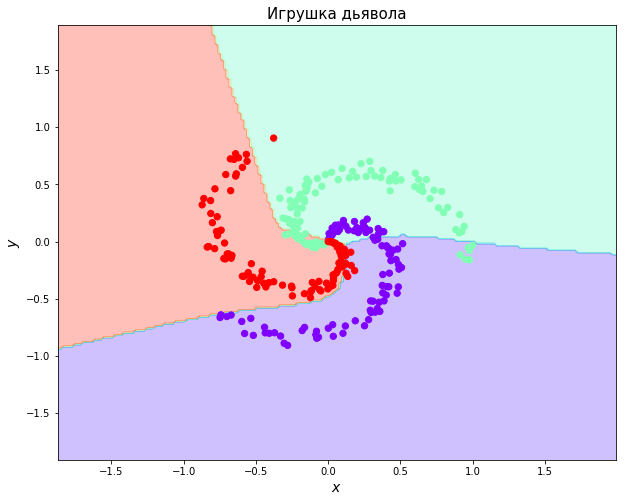

In [16]:
# Отрисовочная магия, снова взято из:
# http://cs231n.github.io/neural-networks-case-study/#linear

h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
grid_tensor = torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()])

Z = two_layer_net(torch.autograd.Variable(grid_tensor))
Z = Z.data.numpy()
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 8))

plt.contourf(xx, yy, Z, cmap=plt.cm.rainbow, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.rainbow)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.title('Игрушка дьявола', fontsize=15)
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.show();

Качество не очень. Как же так, ведь мы использовали 100 нейронов? Разве их мало?

---

### Задача 2

Улучшите сеть (помните про вещи, которые можно менять (см. Компоненты нейросети)). Экспериментируйте, в этом **вся суть deep learning** (и в том, чтобы рано или поздно сетка научилась экспериментировать за Вас :)

In [0]:
# Ваш код здесь (можно (и нужно) создавать больше ячеек)

Несколько советов о том, как строить нейросети. Код выполнен на фреймворке Keras, но, кажется, он довольно интуитивно понятен.

* __Задача:__ Предсказать цену дома в $mil
* __Вход:__ 39 признаков этого дома

In [0]:
model = keras.models.Sequential()
model.add(L.InputLayer([39]))
model.add(L.BatchNormalization())
model.add(L.Dense(128, kernel_initializer=keras.initializers.zeros()))

model.add(L.Dense(128, kernel_initializer=keras.initializers.zeros()))

model.add(L.Dense(1))

model.compile(optimizer='sgd', loss='mean_squared_error')

NameError: ignored

.

.

.

.

.

.

.

.

.

.

.

.

.

.

In [0]:
model = keras.models.Sequential()
model.add(L.InputLayer([39]))
model.add(L.BatchNormalization()) #<- можно просто нормализовать входы 
model.add(L.Dense(128, kernel_initializer=keras.initializers.zeros())) #<-инициализация нулями
model.add(L.Dense(128, kernel_initializer=keras.initializers.zeros())) #<-
model.add(L.Dense(1)) #<- три линейных слоя подряд ни к чему не приведут

model.compile(optimizer='sgd', loss='mean_squared_error') 

NameError: ignored

In [0]:
model = keras.models.Sequential()
model.add(L.InputLayer([39]))
model.add(L.Dense(128, activation='sigmoid'))
model.add(L.BatchNormalization())
model.add(L.Dense(128, activation='sigmoid'))
model.add(L.Dense(1))

model.compile(optimizer='sgd', loss='mean_squared_error')

* __Задача:__ Распознать рукописную цифру (0-9)
* __Вход:__ картинка 28 x 28 пикселей (ч/б)

In [0]:
model = keras.models.Sequential()
model.add(L.InputLayer([28, 28, 1]))
model.add(L.Flatten())
model.add(L.Dense(100))
model.add(L.Activation('relu'))
model.add(L.Dropout(0.1))
model.add(L.Dense(10))
model.add(L.Activation('softmax'))
model.add(L.Dropout(0.1))
model.compile(optimizer='rmsprop', loss='mean_squared_error')

.

.

.

.

.

.

.

.

.

.

.

.

.

.

In [0]:
model = keras.models.Sequential()
model.add(L.InputLayer([28, 28, 1]))
model.add(L.Flatten())
model.add(L.Dense(100))
model.add(L.Activation('relu'))
model.add(L.Dropout(0.1)) # < хороший, годный дропаут
model.add(L.Dense(10))
model.add(L.Activation('softmax'))
model.add(L.Dropout(0.1))
# ^ не стоит dropout-ить вероятности на выходе, рискуете получить бесконечный лосс
model.compile(optimizer='rmsprop', loss='mean_squared_error')
# ^ обучать классификацию по квадратичной ошибке можно, но... это безбожно

In [0]:
model = keras.models.Sequential()
model.add(L.InputLayer([28, 28, 1]))
model.add(L.Flatten())
model.add(L.Dense(100))
model.add(L.Activation('relu'))
model.add(L.Dropout(0.1))
model.add(L.Dense(10))
model.add(L.Activation('softmax'))

model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')

<h3 style="text-align: center;"><b>Полезные ссылки</b></h3>

1). *Примеры написания нейросетей на PyTorch (офийиальные туториалы) (на английском): https://pytorch.org/tutorials/beginner/pytorch_with_examples.html#examples  
https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html*

2). ***Один из самых подробных и полных курсов по deep learning на данный момент - это курс Стэнфордского Университета (он вообще сейчас один из лидеров в области ИИ, его выпускники работают в Google, Facebook, Amazon, Microsoft, в стартапах в Кремниевой долине):  http://cs231n.github.io/***  

3). Практически исчерпывающая информация по основам нейросетей (из cs231n) (на английском):  

http://cs231n.github.io/neural-networks-1/,  
http://cs231n.github.io/neural-networks-2/,  
http://cs231n.github.io/neural-networks-3/,  
http://cs231n.github.io/neural-networks-case-study/#linear

4). *Хорошие статьи по основам нейросетей (на английском):  http://neuralnetworksanddeeplearning.com/chap1.html*

5). *Наглядная демонстрация того, как обучаются нейросети:  https://cs.stanford.edu/people/karpathy/convnetjs/*

6). *Подробнее про backprop -- статья на Medium: https://medium.com/autonomous-agents/backpropagation-how-neural-networks-learn-complex-behaviors-9572ac161670*

7). *Статья из интернет по Backprop: http://page.mi.fu-berlin.de/rojas/neural/chapter/K7.pdf*